In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

In [3]:
df = pd.read_csv("joined_submissions.csv")

In [8]:
# Перевірка на дублікати

df.duplicated().sum()

np.int64(0)

In [9]:
# Нормалізація

scaler = MinMaxScaler()
df[['num_comments', 'score']] = scaler.fit_transform(df[['num_comments', 'score']])

In [4]:
df.count()

author          217057
subreddit       217057
title           217057
num_comments    217057
score           217057
over_18         217057
created         217057
link            217057
text             71473
url             213512
dtype: int64

In [5]:
df.dtypes

author           object
subreddit        object
title            object
num_comments    float64
score           float64
over_18            bool
created          object
link             object
text             object
url              object
dtype: object

In [7]:
df.head()

,author,subreddit,title,num_comments,score,over_18,created,link,text,url
0,u/BurstYourBubbles,worldnews,"S. Korean, Italian FMs hold talks on boosting ...",0.000150,0.000019,False,2023-08-01 03:24,https://www.reddit.com/r/worldnews/comments/15...,NaN,https://en.yna.co.kr/view/AEN20230801001000325?
1,u/BurstYourBubbles,worldnews,Hong Kong gov't would face 'difficulty' if it ...,0.000075,0.000019,False,2023-08-01 03:26,https://www.reddit.com/r/worldnews/comments/15...,NaN,https://hongkongfp.com/2023/08/01/hong-kong-go...
2,u/kurdishgun,AskMiddleEast,Thoughts on exmuslim?,0.004198,0.000019,False,2023-08-01 03:31,https://www.reddit.com/r/AskMiddleEast/comment...,NaN,https://i.redd.it/mmy60for8efb1.png
3,u/TypicalHorror9,worldnews,Professional dancer pumping gas in NYC stabbed...,0.000000,0.000019,False,2023-08-01 03:41,https://www.reddit.com/r/worldnews/comments/15...,NaN,https://www.nydailynews.com/new-york/nyc-crime...
4,u/mrwhiskeyrum,worldnews,Frequent dispatch of ships and aircraft by cer...,0.000899,0.000019,False,2023-08-01 03:44,https://www.reddit.com/r/worldnews/comments/15...,NaN,https://newsinfo.inquirer.net/1809492/foreign-...


In [11]:
print("Rows =", df.shape[0])
print("Columns =", df.shape[1])

Rows = 217057
Columns = 10


In [12]:
import os

print("Size in megabytes:", os.path.getsize("joined_submissions.csv")//(1024*1024))

Size in megabytes: 98


In [29]:
df.to_csv('joined_normalized_submissions.csv', index=False)

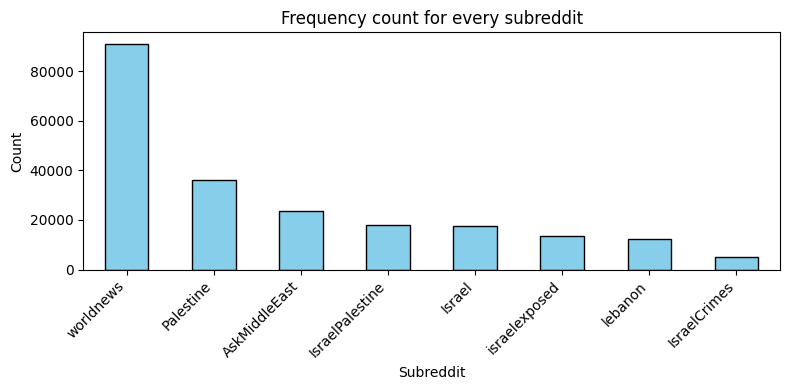

In [15]:
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=['object', 'bool']).columns

counts = df["subreddit"].value_counts().head(10)
plt.figure(figsize=(8, 4))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Frequency count for every subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()